In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load dataset**

In [2]:
(train_data,train_label),(test_data,test_label) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Single layer logistic regression model**

In [4]:
from keras import Sequential
from keras.layers import Input,Dense,Flatten

In [5]:
train_label=tf.one_hot(train_label,depth=10)
test_label=tf.one_hot(test_label,depth=10)
train_data=tf.cast(train_data/255.0,dtype=tf.float32)
test_data=tf.cast(test_data/255.0,dtype=tf.float32)

In [6]:
train_data.shape

TensorShape([60000, 28, 28])

In [7]:
def single_layer_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = 'adam', metrics = ['accuracy'])
  return model

In [8]:
model1 = single_layer_model()
history1 = model1.fit(train_data,train_label,epochs=30,validation_data = (test_data,test_label))

Epoch 1/30
1875/1875 [==============================] - 16s 7ms/step - loss: 0.4691 - accuracy: 0.8769 - val_loss: 0.3101 - val_accuracy: 0.9154
Epoch 2/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3044 - accuracy: 0.9143 - val_loss: 0.2827 - val_accuracy: 0.9216
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2834 - accuracy: 0.9204 - val_loss: 0.2708 - val_accuracy: 0.9249
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9240 - val_loss: 0.2682 - val_accuracy: 0.9256
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2671 - accuracy: 0.9258 - val_loss: 0.2695 - val_accuracy: 0.9265
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2619 - accuracy: 0.9278 - val_loss: 0.2673 - val_accuracy: 0.9259
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2586 - accuracy: 0.9281 - val_loss: 0.2629 - val_accurac

**Deep neural network**

In [9]:
def DNN_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(30,activation='relu'))
  model.add(Dense(90,activation='relu'))
  model.add(Dense(60,activation='relu'))
  model.add(Dense(30,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = 'adam', metrics = ['accuracy'])
  return model

In [10]:
model2 = DNN_model()
history2 = model2.fit(train_data,train_label,epochs=30,validation_data = (test_data,test_label))

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3214 - accuracy: 0.9030 - val_loss: 0.1780 - val_accuracy: 0.9474
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1565 - accuracy: 0.9532 - val_loss: 0.1524 - val_accuracy: 0.9548
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1227 - accuracy: 0.9633 - val_loss: 0.1438 - val_accuracy: 0.9561
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1043 - accuracy: 0.9678 - val_loss: 0.1195 - val_accuracy: 0.9643
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0894 - accuracy: 0.9726 - val_loss: 0.1246 - val_accuracy: 0.9623
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0784 - accuracy: 0.9757 - val_loss: 0.1146 - val_accuracy: 0.9678
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0692 - accuracy: 0.9784 - val_loss: 0.1196 - val_accura

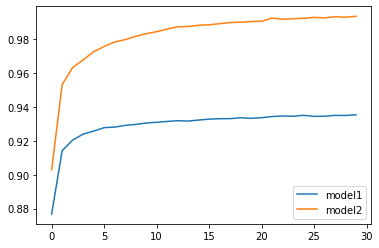

In [11]:
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.legend(['model1','model2'])
plt.show()

**leNet**

In [12]:
train_data.shape

TensorShape([60000, 28, 28])

In [13]:
def leNet(image):
  image = tf.reshape(image,[-1,28,28,1])
  layer1 = tf.keras.layers.Conv2D(6, 5, activation='relu', input_shape=(-1,28,28,1),padding='same')(image)
  layer2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same')(layer1)
  layer3 = tf.keras.layers.Conv2D(16, 5, activation='relu', input_shape=(-1,14,14,1))(layer2)
  layer4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same')(layer3)
  return layer1,layer2,layer3,layer4


In [14]:
layer1,layer2,layer3,layer4 = leNet(train_data[0])

In [15]:
layer1.shape,layer2.shape,layer3.shape,layer4.shape

(TensorShape([1, 28, 28, 6]),
 TensorShape([1, 14, 14, 6]),
 TensorShape([1, 10, 10, 16]),
 TensorShape([1, 5, 5, 16]))

**Plotting layer 1 feature maps**

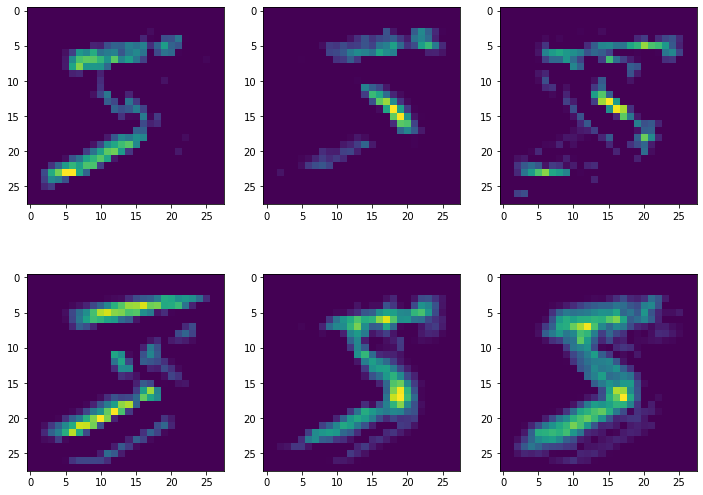

In [37]:
filters = layer1.numpy()[0]

f, axarr = plt.subplots(2,3,figsize=(12,9))
ptr=0
for i in range(2):
  for j in range(3):
    axarr[i,j].imshow(filters[:,:,ptr])
    ptr+=1

**Plotting layer 2 feature maps**

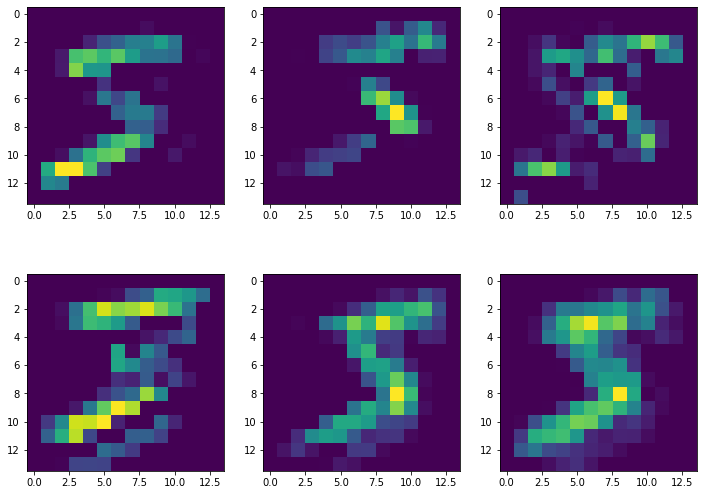

In [34]:
filters = layer2.numpy()[0]

f, axarr = plt.subplots(2,3,figsize=(12,9))
ptr=0
for i in range(2):
  for j in range(3):
    axarr[i,j].imshow(filters[:,:,ptr])
    ptr+=1

**plotting layer 3 feature maps**

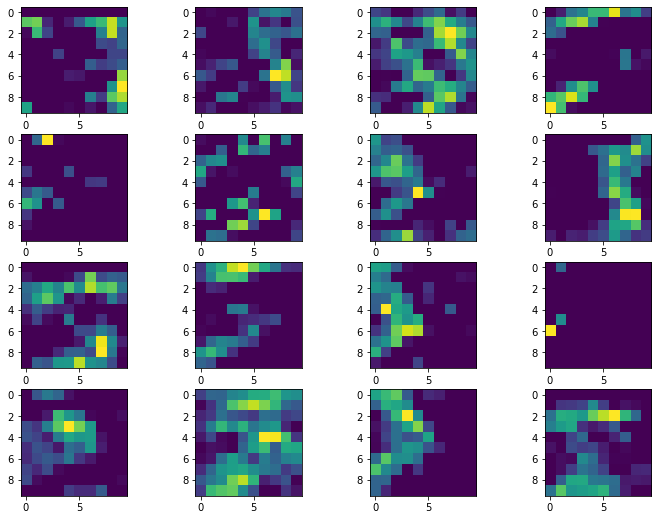

In [35]:
filters = layer3.numpy()[0]

f, axarr = plt.subplots(4,4,figsize=(12,9))
ptr=0
for i in range(4):
  for j in range(4):
    axarr[i,j].imshow(filters[:,:,ptr])
    ptr+=1

**Plotting layer 4 feature maps**

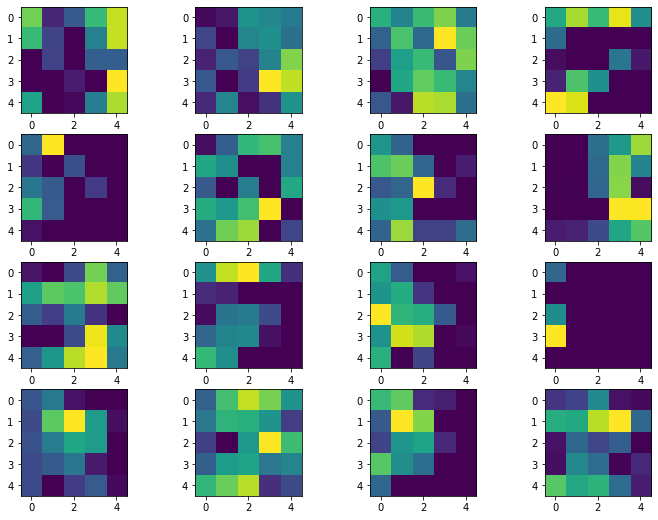

In [36]:
filters = layer4.numpy()[0]

f, axarr = plt.subplots(4,4,figsize=(12,9))
ptr=0
for i in range(4):
  for j in range(4):
    axarr[i,j].imshow(filters[:,:,ptr])
    ptr+=1